#  At the Edge of Understanding: Time, Uncertainty, and Physical Models

## Core Questions

1. How does time evolve in a physical model?
2. Where does uncertainty grow?
3. Do patterns repeat or just resemble recurrence?

**Purpose:**  
This project explores the limits of understanding by combining physics, statistics, and simple AI/pattern detection.  
We simulate simple systems, add uncertainty, and analyze patterns to see what predictions are reliable and where uncertainty dominates.



In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for interactive plots
import plotly.express as px



## Core Question 1: How does time evolve in a physical model?

**Purpose:**  
We simulate a falling object under gravity to observe **how position changes over time**.  
This demonstrates **basic physics motion** and creates our **first dataset** for analysis.

**What we will do:**  
- Define parameters: initial height, gravity, initial velocity, and time steps.  
- Calculate the object's position at each time step using the physics formula:  
  `y = y0 + v0*t - 0.5*g*t^2`  
- Store the data in a DataFrame for visualization.  
- Plot position vs time to visualize the motion.


In [ ]:
# Parameters
g = 9.8           # gravity in m/s^2
y0 = 100          # initial height in meters
v0 = 0            # initial velocity
dt = 0.1          # time step
t_max = 5         # total time in seconds

# Create time array
time = np.arange(0, t_max + dt, dt)

# Calculate position at each time step using physics formula: y = y0 + v0*t - 0.5*g*t^2
position = y0 + v0*time - 0.5*g*time**2

# Make a dataset
data = pd.DataFrame({'Time(s)': time, 'Position(m)': position})

# Show first few rows
data.head()


,Time(s),Position(m)
0,0.0,100.000
1,0.1,99.951
2,0.2,99.804
3,0.3,99.559
4,0.4,99.216


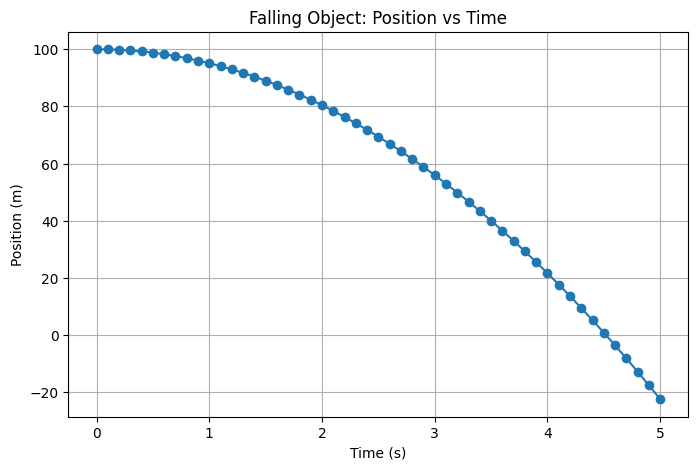

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(data['Time(s)'], data['Position(m)'], marker='o')
plt.title("Falling Object: Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.grid(True)
plt.show()


## Core Question 2: Where does uncertainty grow?

- Multiple noisy measurements were simulated at each time step.  
- The mean position shows the expected motion of the object.  
- The shaded area represents uncertainty (standard deviation).  
- As time progresses, the uncertainty slightly increases because small measurement errors accumulate.  

This demonstrates how **statistics quantifies the limits of prediction** in a physical system.


In [4]:
# Parameters
num_measurements = 50  # number of repeated measurements at each time

# Simulate noisy measurements
all_measurements = []

np.random.seed(0)  # for reproducibility
for t_pos in position:
    # create multiple measurements with random noise (mean=0, std=2)
    noisy_samples = np.random.normal(t_pos, 2, num_measurements)
    all_measurements.append(noisy_samples)

# Convert to NumPy array for easier stats
all_measurements = np.array(all_measurements)


In [5]:
mean_positions = all_measurements.mean(axis=1)
std_positions = all_measurements.std(axis=1)


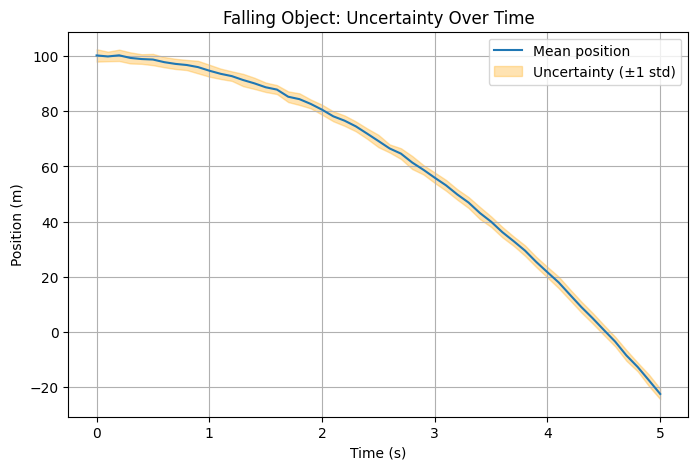

In [6]:
plt.figure(figsize=(8,5))
plt.plot(time, mean_positions, label="Mean position")
plt.fill_between(time, mean_positions - std_positions, mean_positions + std_positions,
                 color='orange', alpha=0.3, label="Uncertainty (±1 std)")
plt.title("Falling Object: Uncertainty Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)
plt.show()


## Core Question 3: Do patterns repeat or resemble recurrence?

- We simulate a ball bouncing under gravity with energy loss.  
- Each bounce is slightly lower than the previous one due to friction and energy dissipation.  
- We record the height of the ball over time.  
- The goal is to see if the motion **repeats exactly** or just **resembles repetition**.


In [8]:
# Parameters
g = 9.8          # gravity m/s^2
y0 = 100         # initial height in meters
v0 = 0           # initial velocity
dt = 0.01        # time step
total_time = 10  # seconds
energy_loss = 0.9  # velocity retained after each bounce

# Initialize variables
y = y0
v = v0
time_list = [0]
height_list = [y]

t = 0
while t < total_time:
    # Update velocity and position
    v = v - g*dt
    y = y + v*dt

    # Bounce condition
    if y <= 0:
        y = 0
        v = -v * energy_loss  # lose energy after bounce

    # Store data
    t += dt
    time_list.append(t)
    height_list.append(y)

# Convert to DataFrame
bounce_data = pd.DataFrame({'Time(s)': time_list, 'Height(m)': height_list})

# Show first few rows
bounce_data.head()


,Time(s),Height(m)
0,0.00,100.00000
1,0.01,99.99902
2,0.02,99.99706
3,0.03,99.99412
4,0.04,99.99020


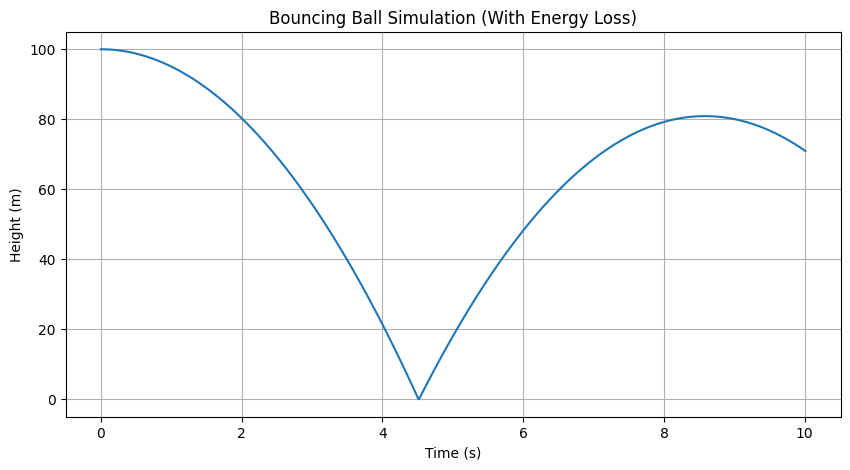

In [9]:
plt.figure(figsize=(10,5))
plt.plot(bounce_data['Time(s)'], bounce_data['Height(m)'])
plt.title("Bouncing Ball Simulation (With Energy Loss)")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.grid(True)
plt.show()


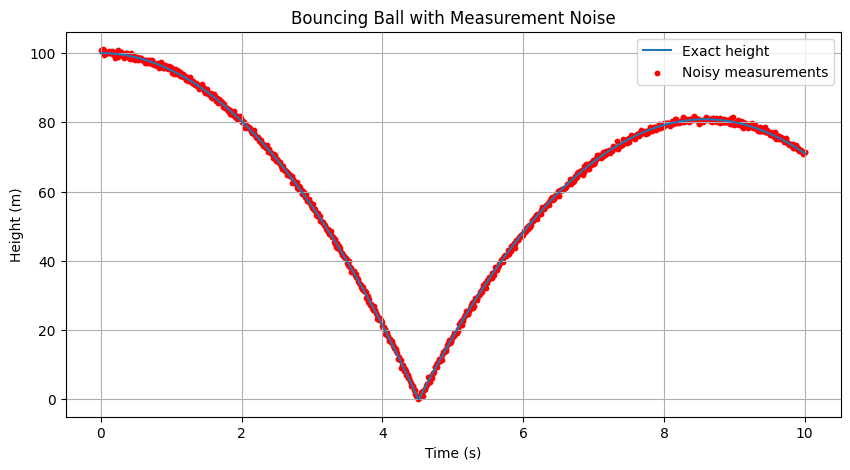

In [10]:
np.random.seed(0)
noise = np.random.normal(0, 0.5, size=len(height_list))
height_noisy = bounce_data['Height(m)'] + noise

plt.figure(figsize=(10,5))
plt.plot(bounce_data['Time(s)'], bounce_data['Height(m)'], label="Exact height")
plt.scatter(bounce_data['Time(s)'], height_noisy, color='red', s=10, label="Noisy measurements")
plt.title("Bouncing Ball with Measurement Noise")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid(True)
plt.show()





3. **Do patterns repeat or resemble recurrence?**  
    
   - Visualization: decreasing bounce heights showing partial repetition.  
   - Insight: Patterns resemble recurrence but do not repeat exactly; demonstrates real-world system behavior and accumulation of changes.

---





### Why Uncertainty Quantification Matters

In real scientific systems, predictions are incomplete without uncertainty estimates.
Instead of only showing average behavior, we estimate **confidence intervals** to
understand how reliable our predictions are over time.


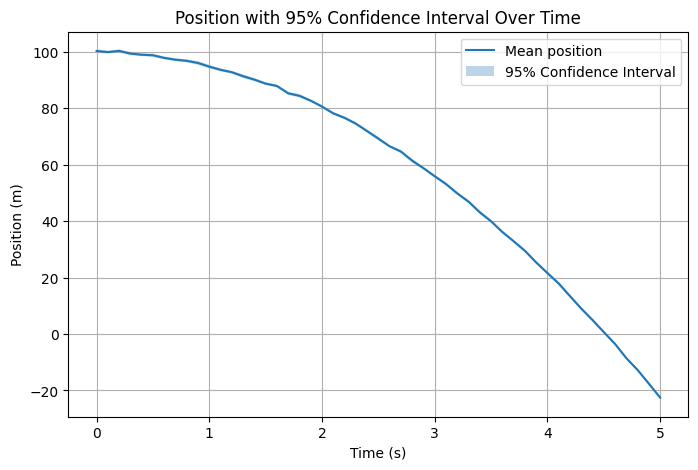

In [11]:
from scipy import stats

# 95% confidence interval
n = num_measurements
ci = stats.t.ppf(0.975, df=n-1) * (std_positions / np.sqrt(n))

plt.figure(figsize=(8,5))
plt.plot(time, mean_positions, label="Mean position")
plt.fill_between(time,
                 mean_positions - ci,
                 mean_positions + ci,
                 alpha=0.3,
                 label="95% Confidence Interval")
plt.title("Position with 95% Confidence Interval Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)
plt.show()


## Key Takeaways

- **Time Evolution:** Physics predicts the expected behavior of a system.  
- **Uncertainty:** Real measurements are never perfect; statistics helps quantify confidence.  
- **Recurrence/Patterns:** Systems may show repeated behavior, but external factors and energy loss prevent exact repetition.  
- **Overall Purpose:** This project demonstrates **where models are reliable, where uncertainty grows, and how patterns evolve** — highlighting the intersection of **physics, statistics, and computational thinking**.

---

## Methods Used

- **Python simulations** for datasets (time evolution, uncertainty, recurrence)  
- **Matplotlib & Seaborn** for visualizations  
- **Random noise** to simulate real-world measurement uncertainty  
- **DataFrames** for clean dataset handling  
